In [2]:
import sys
import os
sys.path.append(os.path.abspath('..'))
from pipeline import Pipeline
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
pipeline = Pipeline()

In [ ]:
file_path = "../storage/u.data"  
dataset = pipeline.load_dataset(file_path)

print(dataset.head())


Dataset Loaded:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype
---  ------     --------------   -----
 0   user       100000 non-null  int64
 1   item       100000 non-null  int64
 2   rating     100000 non-null  int64
 3   timestamp  100000 non-null  int64
dtypes: int64(4)
memory usage: 3.1 MB
None
               user           item         rating     timestamp
count  100000.00000  100000.000000  100000.000000  1.000000e+05
mean      462.48475     425.530130       3.529860  8.835289e+08
std       266.61442     330.798356       1.125674  5.343856e+06
min         1.00000       1.000000       1.000000  8.747247e+08
25%       254.00000     175.000000       3.000000  8.794487e+08
50%       447.00000     322.000000       4.000000  8.828269e+08
75%       682.00000     631.000000       4.000000  8.882600e+08
max       943.00000    1682.000000       5.000000  8.932866e+08
   user  item  rating 

In [ ]:
# stratified sampling
train_set_strat, test_set_strat = pipeline.partition_data(dataset, partition_type='stratified')

# temporal sampling
train_set_temp, test_set_temp = pipeline.partition_data(dataset, partition_type='temporal')

print("Stratified Sampling:")
print(f"Training set size: {len(train_set_strat)}, Testing set size: {len(test_set_strat)}")

print("\nTemporal Sampling:")
print(f"Training set size: {len(train_set_temp)}, Testing set size: {len(test_set_temp)}")


Training set size: 80000
Testing set size: 20000
Training set size: 80000
Testing set size: 20000
Stratified Sampling:
Training set size: 80000, Testing set size: 20000

Temporal Sampling:
Training set size: 80000, Testing set size: 20000


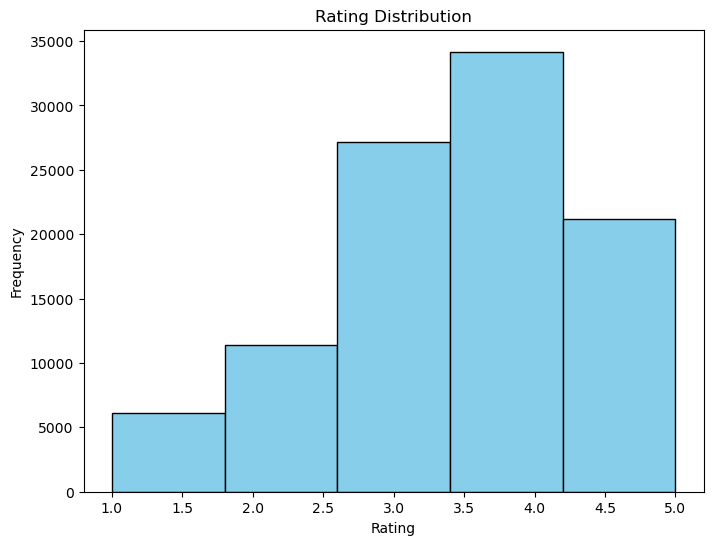

In [ ]:
plt.figure(figsize=(8, 6))
plt.hist(dataset['rating'], bins=5, color='skyblue', edgecolor='black')
plt.title('Rating Distribution')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()


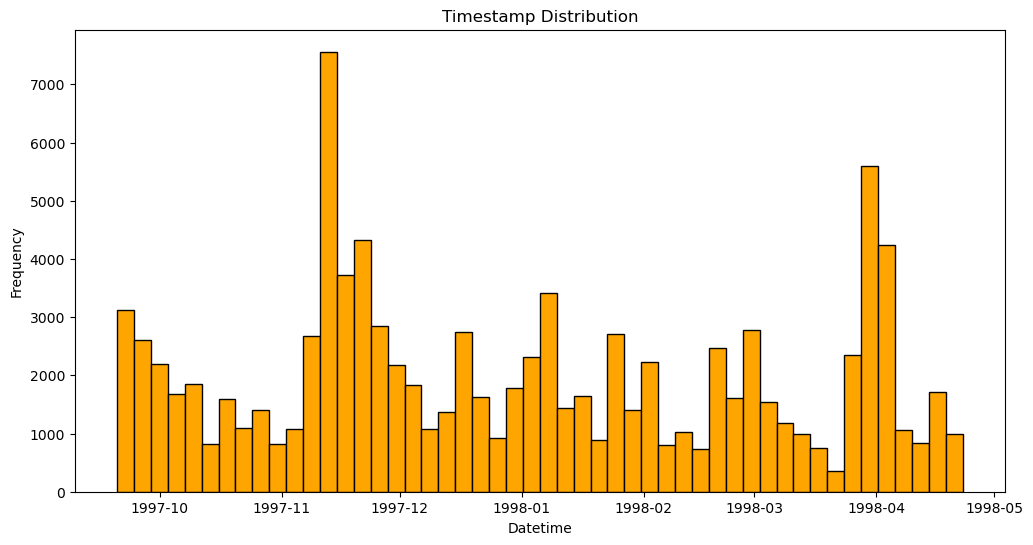

In [ ]:
dataset['datetime'] = pd.to_datetime(dataset['timestamp'], unit='s')

plt.figure(figsize=(12, 6))
plt.hist(dataset['datetime'], bins=50, color='orange', edgecolor='black')
plt.title('Timestamp Distribution')
plt.xlabel('Datetime')
plt.ylabel('Frequency')
plt.show()
